Pricing homes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Set global variables

Define functions

Define data science problem

In [2]:
# Business problem: Predict the price of a home
# Data science problem: Given a set of features of a home, predict its price

Gather data

In [3]:
# Load the dataset from a public URL
url = "https://jse.amstat.org/v19n3/decock/AmesHousing.txt"
df = pd.read_csv(url, sep="\t")  # Tab-separated values
df.head()  # Display the first few rows of the dataset

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Explore data

In [8]:
# 1. Check dataset shape and missing values
# This gives a quick overview of dataset size and highlights columns with missing data,
# which may require imputation or exclusion during preprocessing.
print("Shape of dataset:", df.shape)
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

Shape of dataset: (2930, 82)

Missing values per column:
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
                  ... 
Mo Sold              0
Yr Sold              0
Sale Type            0
Sale Condition       0
SalePrice            0
Length: 82, dtype: int64


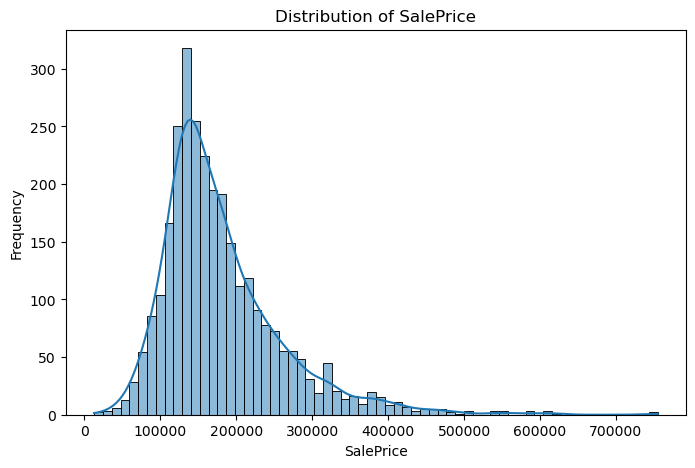

In [9]:
# 2. Visualize the distribution of the target variable
# Understanding the distribution of SalePrice helps identify skewness, outliers,
# and whether a transformation (e.g. log) might improve model performance.
target = "SalePrice"
plt.figure(figsize=(8, 5))
sns.histplot(df[target], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [10]:
# 3. Summary statistics for numeric features
# This helps detect outliers, scale differences, and potential data entry errors.
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("\nSummary statistics for numeric features:")
print(df[numeric_cols].describe().T)


Summary statistics for numeric features:
                  count          mean           std          min  \
Order            2930.0  1.465500e+03  8.459625e+02          1.0   
PID              2930.0  7.144645e+08  1.887308e+08  526301100.0   
MS SubClass      2930.0  5.738737e+01  4.263802e+01         20.0   
Lot Frontage     2440.0  6.922459e+01  2.336533e+01         21.0   
Lot Area         2930.0  1.014792e+04  7.880018e+03       1300.0   
Overall Qual     2930.0  6.094881e+00  1.411026e+00          1.0   
Overall Cond     2930.0  5.563140e+00  1.111537e+00          1.0   
Year Built       2930.0  1.971356e+03  3.024536e+01       1872.0   
Year Remod/Add   2930.0  1.984267e+03  2.086029e+01       1950.0   
Mas Vnr Area     2907.0  1.018968e+02  1.791126e+02          0.0   
BsmtFin SF 1     2929.0  4.426296e+02  4.555908e+02          0.0   
BsmtFin SF 2     2929.0  4.972243e+01  1.691685e+02          0.0   
Bsmt Unf SF      2929.0  5.592625e+02  4.394942e+02          0.0   
Total 

In [11]:
# 4. Cardinality of categorical features
# High-cardinality features may lead to sparse one-hot encodings and overfitting.
# This helps decide whether to group rare categories or drop certain features.
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nTop 10 categorical features by number of unique values:")
print(df[categorical_cols].nunique().sort_values(ascending=False).head(10))


Top 10 categorical features by number of unique values:
Neighborhood    28
Exterior 2nd    17
Exterior 1st    16
Sale Type       10
Condition 1      9
House Style      8
Functional       8
Roof Matl        8
Condition 2      8
MS Zoning        7
dtype: int64



Top features most correlated with SalePrice:
Garage Yr Blt     0.526965
Year Remod/Add    0.532974
Full Bath         0.545604
Year Built        0.558426
1st Flr SF        0.621676
Total Bsmt SF     0.632280
Garage Area       0.640401
Garage Cars       0.647877
Gr Liv Area       0.706780
Overall Qual      0.799262
Name: SalePrice, dtype: float64
PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
Name: SalePrice, dtype: float64


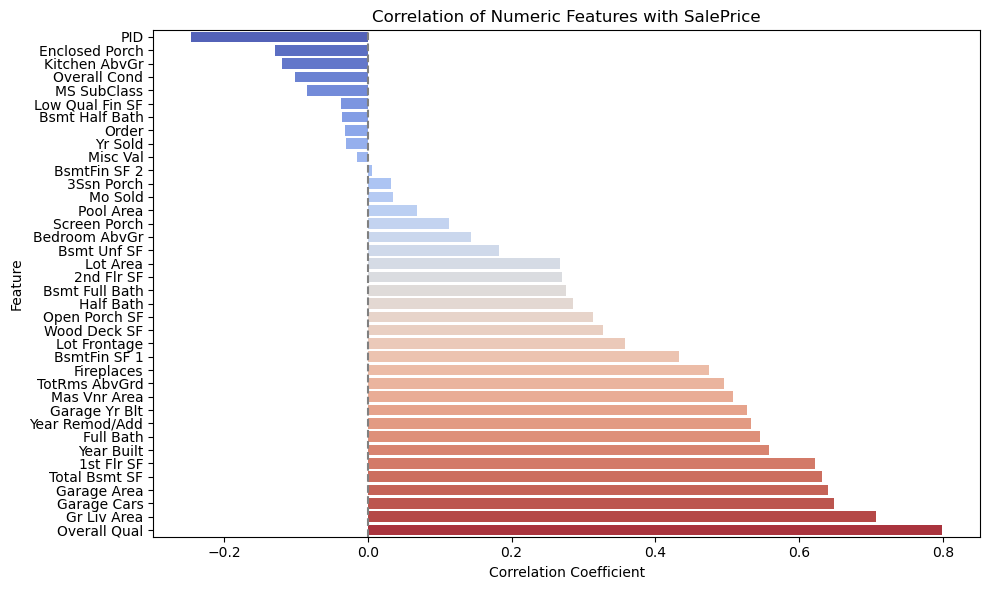

In [14]:
# 5. Correlation of numeric features with target
# This helps identify which features are most predictive of SalePrice.
# Positive correlations suggest features that increase price; negative ones may indicate price-reducing factors.
# Visualizing both helps guide feature selection and engineering.

# Compute correlation with target
corr = df[numeric_cols].corr()[target].drop(target).sort_values()

# Display top correlations (both positive and negative)
print("\nTop features most correlated with SalePrice:")
print(corr.tail(10))  # Most positive
print(corr.head(10))  # Most negative

# Prepare DataFrame for plotting
corr_df = corr.reset_index()
corr_df.columns = ["Feature", "Correlation"]

# Plot correlations using hue for color mapping
plt.figure(figsize=(10, 6))
sns.barplot(
    data=corr_df,
    x="Correlation",
    y="Feature",
    hue="Feature",
    palette="coolwarm",
    dodge=False,
    legend=False
)
plt.title("Correlation of Numeric Features with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.axvline(0, color="gray", linestyle="--")
plt.tight_layout()
plt.show()

In [15]:
# 6. Detect potential data leakage or ID-like columns
# Columns with many unique values and low correlation to the target may be IDs or keys,
# which should be excluded from modeling to avoid leakage or noise.
high_cardinality = df[numeric_cols].nunique()
low_corr = corr.abs() < 0.05
suspect_cols = high_cardinality[high_cardinality > 100].index.intersection(low_corr[low_corr].index)
print("\nColumns with high cardinality and low correlation (possible IDs):")
print(suspect_cols.tolist())


Columns with high cardinality and low correlation (possible IDs):
['Order', 'BsmtFin SF 2']


In [16]:
# 7. Check for duplicate rows
# Duplicate rows can distort model training and evaluation, especially in small datasets.
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [17]:
# 8. Identify zero or near-zero variance columns
# Features with no variability provide no predictive value and should be removed.
zero_var_cols = df.loc[:, df.nunique() <= 1].columns.tolist()
print("\nColumns with zero or near-zero variance:", zero_var_cols)


Columns with zero or near-zero variance: []
